## Importar librerías necesarias

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.datasets import load_digits
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score, confusion_matrix
from sklearn.manifold import Isomap

## Cargar el dataset de dígitos

Forma de las imágenes: (1797, 8, 8)


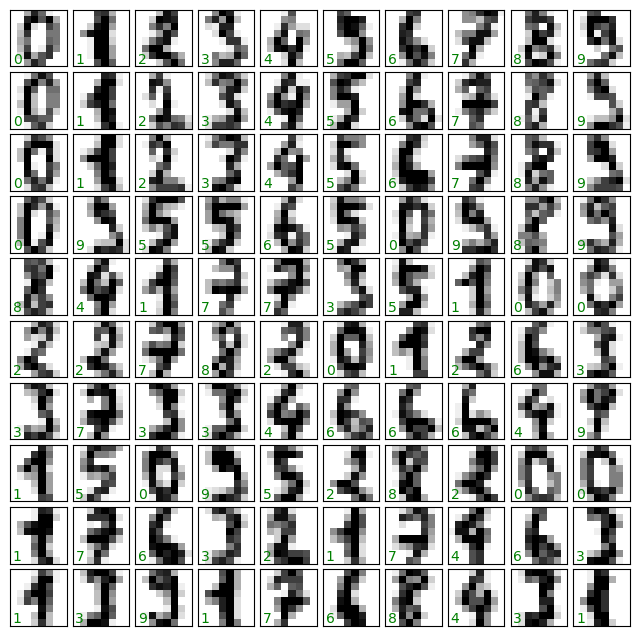

In [2]:
digits = load_digits()
print("Forma de las imágenes:", digits.images.shape)

# Visualizar algunos dígitos
fig, axes = plt.subplots(10, 10, figsize=(8, 8),
                        subplot_kw={'xticks': [], 'yticks': []},
                        gridspec_kw=dict(hspace=0.1, wspace=0.1))
for i, ax in enumerate(axes.flat):
    ax.imshow(digits.images[i], cmap='binary', interpolation='nearest')
    ax.text(0.05, 0.05, str(digits.target[i]), transform=ax.transAxes, color='green')

## Preparar los datos para Scikit-Learn

Forma de X: (1797, 64)
Forma de y: (1797,)


C:\Users\0020802\AppData\Local\anaconda3\Lib\site-packages\sklearn\manifold\_isomap.py:383: UserWarning: The number of connected components of the neighbors graph is 2 > 1. Completing the graph to fit Isomap might be slow. Increase the number of neighbors to avoid this issue.
  self._fit_transform(X)
C:\Users\0020802\AppData\Local\anaconda3\Lib\site-packages\scipy\sparse\_index.py:108: SparseEfficiencyWarning: Changing the sparsity structure of a csr_matrix is expensive. lil_matrix is more efficient.
  self._set_intXint(row, col, x.flat[0])
C:\Temp\ipykernel_32132\3569400836.py:13: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed in 3.11. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap()`` or ``pyplot.get_cmap()`` instead.
  cmap=plt.cm.get_cmap('rainbow', 10))


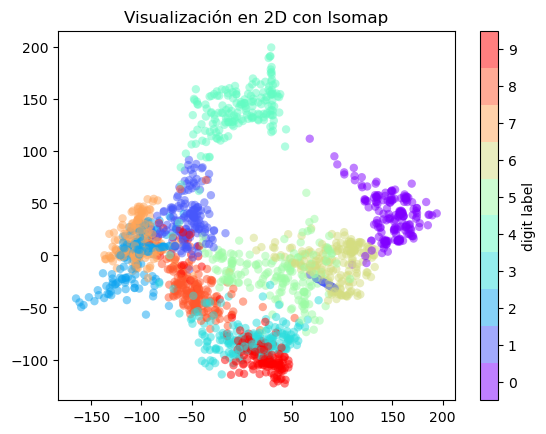

In [3]:
X = digits.data
y = digits.target
print("Forma de X:", X.shape)
print("Forma de y:", y.shape)

# Reducción de dimensionalidad con Isomap
iso = Isomap(n_components=2)
data_projected = iso.fit_transform(X)

# Visualizar los datos en 2D
plt.scatter(data_projected[:, 0], data_projected[:, 1], c=y, edgecolor='none', alpha=0.5,
            cmap=plt.cm.get_cmap('rainbow', 10))
plt.colorbar(label='digit label', ticks=range(10))
plt.clim(-0.5, 9.5)
plt.title("Visualización en 2D con Isomap")
plt.show()

## Matriz de confusión

Precisión del modelo Naive Bayes: 0.8333333333333334


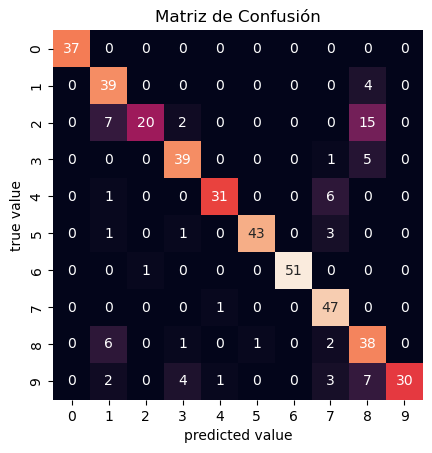

In [4]:
# Dividir los datos en entrenamiento y prueba
Xtrain, Xtest, ytrain, ytest = train_test_split(X, y, random_state=0)

# Entrenar un modelo Naive Bayes
model = GaussianNB()
model.fit(Xtrain, ytrain)
y_model = model.predict(Xtest)

# Evaluar la precisión del modelo
accuracy = accuracy_score(ytest, y_model)
print("Precisión del modelo Naive Bayes:", accuracy)

# Matriz de confusión
mat = confusion_matrix(ytest, y_model)
sns.heatmap(mat, square=True, annot=True, cbar=False)
plt.xlabel('predicted value')
plt.ylabel('true value')
plt.title("Matriz de Confusión")
plt.show()

## Visualizar predicciones (correctas en verde, incorrectas en rojo)

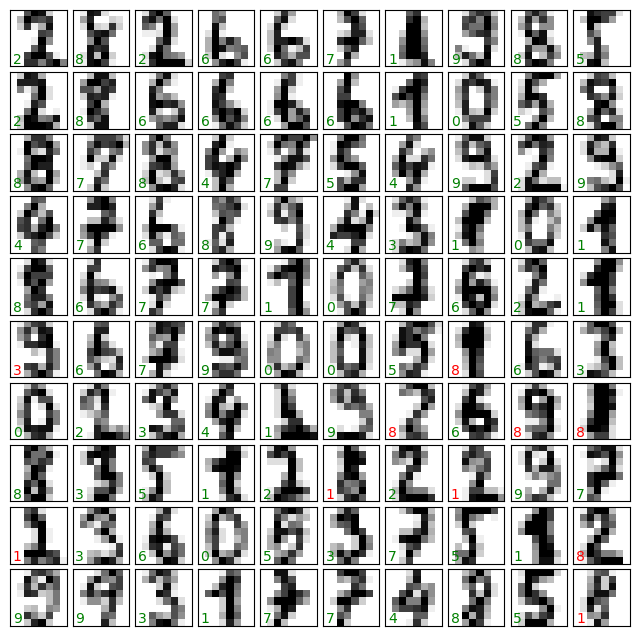

In [5]:
fig, axes = plt.subplots(10, 10, figsize=(8, 8),
                        subplot_kw={'xticks': [], 'yticks': []},
                        gridspec_kw=dict(hspace=0.1, wspace=0.1))
test_images = Xtest.reshape(-1, 8, 8)
for i, ax in enumerate(axes.flat):
    ax.imshow(test_images[i], cmap='binary', interpolation='nearest')
    ax.text(0.05, 0.05, str(y_model[i]),
            transform=ax.transAxes,
            color='green' if (ytest[i] == y_model[i]) else 'red')
plt.show()